#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score


plt.rc('figure',figsize=(18,9))

from imblearn.over_sampling import SMOTE

#Uploading Data

In [ ]:
df=pd.read_csv(r"/content/BankChurners.csv")

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


#Data Cleaning

##The last two naive bayes colums are irrelevant along with clientnum


In [ ]:
df=df.drop(columns=["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##Converting Attrition_Flag and Gender to binary

In [ ]:
df["Attrition_Flag"].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [ ]:
df["Gender"].value_counts()

,count
Gender,
F,5358
M,4769


In [ ]:
df["Attrition_Flag"]=df["Attrition_Flag"].map({"Existing Customer":0,"Attrited Customer":1})
df["Gender"]=df["Gender"].map({"F":0,"M":1})
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#EDA

##Customers age Variation

In [ ]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Customer_Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=df['Customer_Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

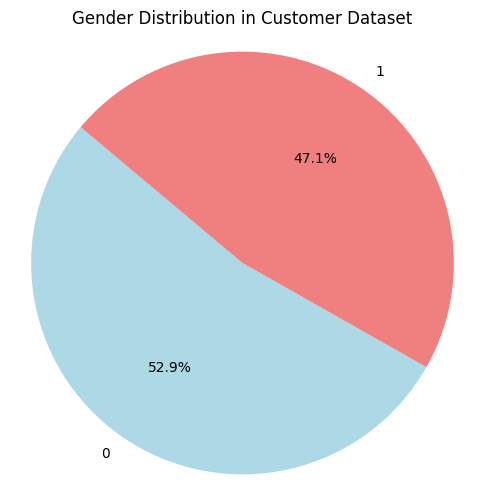

In [ ]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightblue', 'lightcoral']  # Optional: Customize colors

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution in Customer Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

/tmp/ipython-input-85-3425094239.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




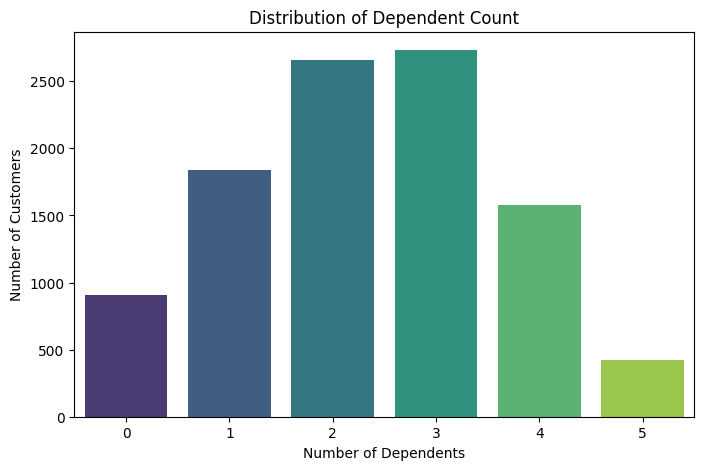

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dependent_count', palette='viridis')
plt.title('Distribution of Dependent Count')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Customers')
plt.show()

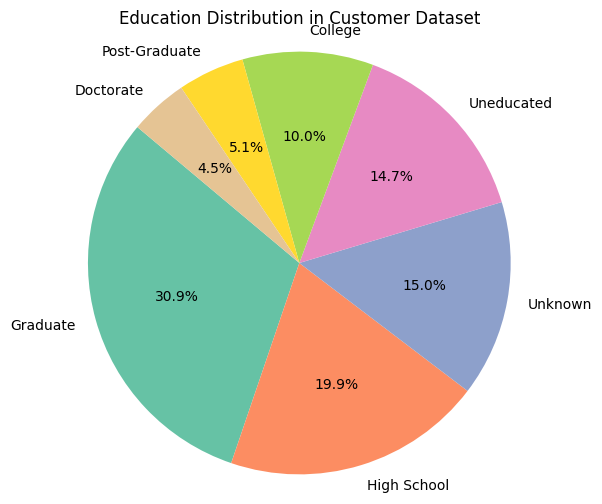

In [ ]:
education_counts = df['Education_Level'].value_counts()
labels = education_counts.index
sizes = education_counts.values
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Education Distribution in Customer Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

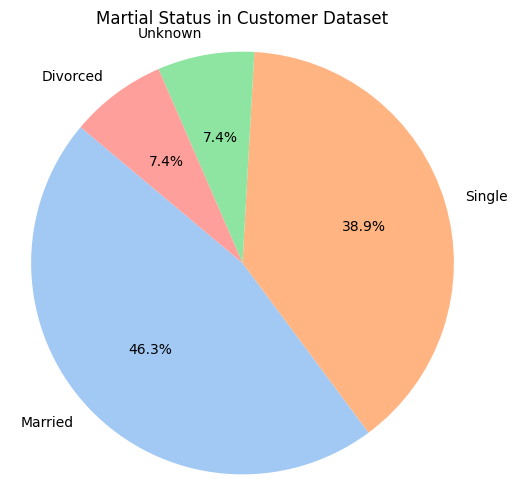

In [ ]:
Marital_Status_counts = df['Marital_Status'].value_counts()
labels = Marital_Status_counts.index
sizes = Marital_Status_counts.values
colors = sns.color_palette("pastel",len(labels))

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Martial Status in Customer Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

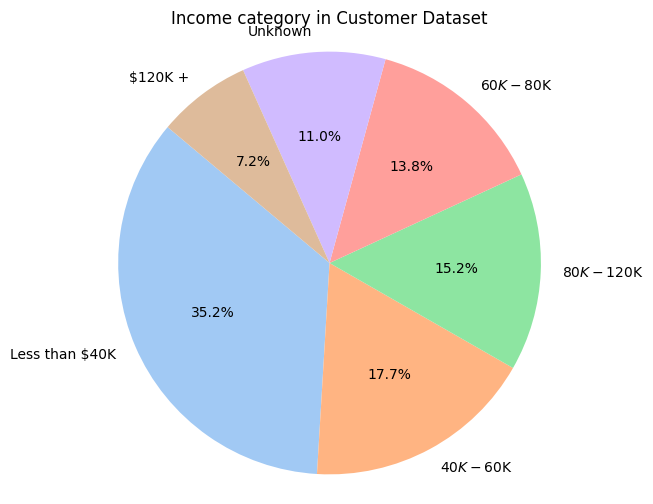

In [ ]:
Income_Category_counts = df['Income_Category'].value_counts()
labels = Income_Category_counts.index
sizes = Income_Category_counts.values
colors = sns.color_palette("pastel",len(labels))

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Income category in Customer Dataset')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

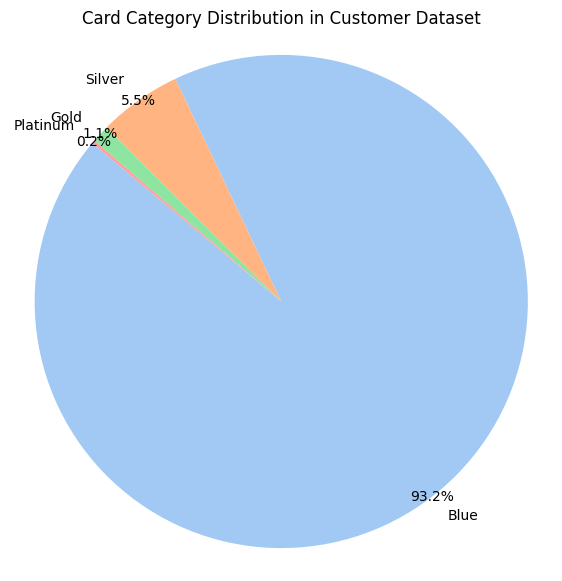

In [ ]:
card_counts = df['Card_Category'].value_counts()
labels = card_counts.index
sizes = card_counts.values
colors = sns.color_palette("pastel", len(labels))

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1)
plt.title('Card Category Distribution in Customer Dataset')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

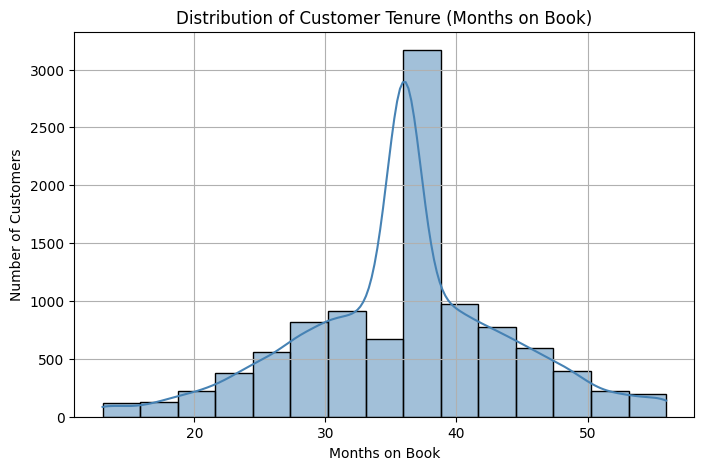

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Months_on_book', bins=15, kde=True, color='steelblue')
plt.title('Distribution of Customer Tenure (Months on Book)')
plt.xlabel('Months on Book')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [ ]:
print('Kurtosis of Months on book features is : {}'.format(df['Months_on_book'].kurt()))

Kurtosis of Months on book features is : 0.40010012019986707


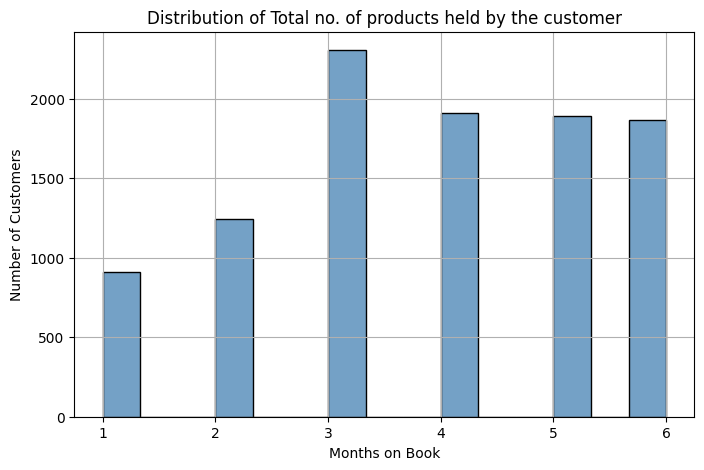

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Total_Relationship_Count', bins=15, color='steelblue')
plt.title('Distribution of Total no. of products held by the customer')
plt.xlabel('Months on Book')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

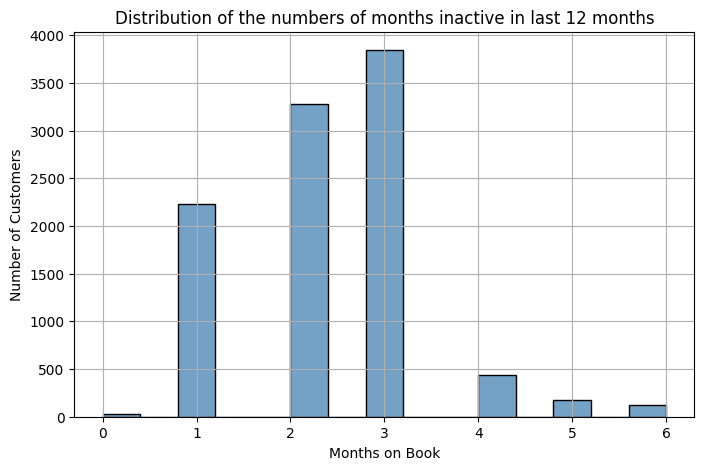

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Months_Inactive_12_mon', bins=15, color='steelblue')
plt.title('Distribution of the numbers of months inactive in last 12 months')
plt.xlabel('Months on Book')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

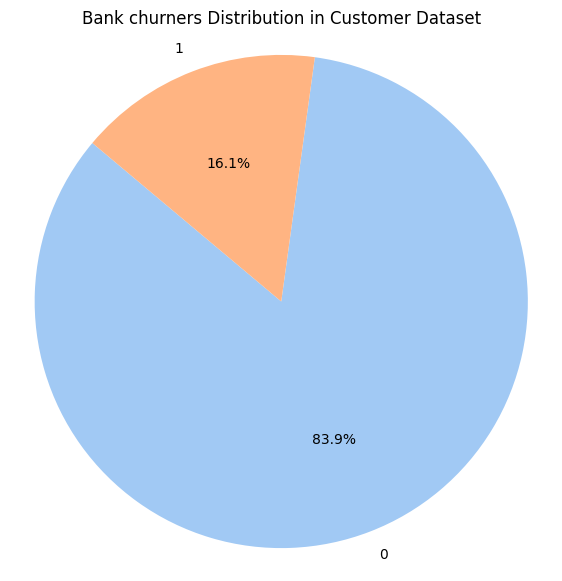

In [ ]:
churn_counts = df['Attrition_Flag'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = sns.color_palette("pastel", len(labels))

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Bank churners Distribution in Customer Dataset')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

#Data Preprocessing

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['Card_Category']).drop(columns=['Platinum'])],axis=1)
df.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)

In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,1,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,0,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,1,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,0,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,1,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,40,3,2,3,4003.0,1851,...,True,False,False,False,False,False,True,True,False,False
10123,1,41,1,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,True,False,False
10124,1,44,0,1,36,5,3,4,5409.0,0,...,False,False,False,True,False,True,False,True,False,False
10125,1,30,1,2,36,4,3,3,5281.0,0,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=0.7,ygap=0.7,colorscale=colorscale),
    row=1, col=1
)


s_val =df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=0.7,ygap=0.7,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Numeric Correaltions")
fig.show()


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(df[df.columns[1:]], df[df.columns[0]])
usampled_df = X.assign(Churn = y)

In [ ]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [ ]:
usampled_df

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45,1,3,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0
1,49,0,5,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0
2,51,1,3,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0
3,40,0,4,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0
4,40,1,3,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,48,0,1,36,1,3,4,7170.614277,0,7170.614277,0.442669,1306,30,0.582678,0.000000,1
16996,39,0,1,36,3,3,2,1438.953329,542,896.725768,0.543000,2295,39,0.732920,0.376640,1
16997,56,0,1,37,2,3,2,1438.300000,644,794.236343,0.889322,711,15,0.465659,0.447668,1
16998,46,0,3,37,5,2,2,2800.884954,0,2800.884954,0.655028,2209,38,0.645322,0.000000,1


In [ ]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =usampled_df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =usampled_df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Upsmapled Correlations")
fig.show()

##Principal Component Analysis Of One Hot Encoded Data

In [ ]:
N_COMPONENTS = 4

pca_model = PCA(n_components = N_COMPONENTS )

pc_matrix = pca_model.fit_transform(ohe_data)

evr = pca_model.explained_variance_ratio_
total_var = evr.sum() * 100
cumsum_evr = np.cumsum(evr)

trace1 = {
    "name": "individual explained variance",
    "type": "bar",
    'y':evr}
trace2 = {
    "name": "cumulative explained variance",
    "type": "scatter",
     'y':cumsum_evr}
data = [trace1, trace2]
layout = {
    "xaxis": {"title": "Principal components"},
    "yaxis": {"title": "Explained variance ratio"},
  }
fig = go.Figure(data=data, layout=layout)
fig.update_layout(     title='Explained Variance Using {} Dimensions'.format(N_COMPONENTS))
fig.show()

In [ ]:
usampled_df_with_pcs = pd.concat([usampled_df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

In [ ]:
fig = ex.scatter_matrix(
    usampled_df_with_pcs[['PC-{}'.format(i) for i in range(0,N_COMPONENTS)]].values,
    color=usampled_df_with_pcs.Credit_Limit,
    dimensions=range(N_COMPONENTS),
    labels={str(i):'PC-{}'.format(i) for i in range(0,N_COMPONENTS)},
    title=f'Total Explained Variance: {total_var:.2f}%')

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Credit_Limit",
    ),
)
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))


s_val =usampled_df_with_pcs.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =usampled_df_with_pcs.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Upsmapled Correlations With PC\'s")
fig.show()

#Model selection and evaluation

In [ ]:
X_features = ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']

X = usampled_df_with_pcs[X_features]
y = usampled_df_with_pcs['Churn']

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

##cross validation

In [ ]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')

In [ ]:
fig = make_subplots(rows=3, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Adaboost Cross Val Scores',
                                                                    'SVM Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(ada_f1_cross_val_scores))),y=ada_f1_cross_val_scores,name='Adaboost'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(svm_f1_cross_val_scores))),y=svm_f1_cross_val_scores,name='SVM'),
    row=3, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

##model evaluation

In [ ]:
rf_pipe.fit(train_x,train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x,train_y)
ada_prediction = ada_pipe.predict(test_x)

svm_pipe.fit(train_x,train_y)
svm_prediction = svm_pipe.predict(test_x)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>F1 Score On Test Data<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),

                 cells=dict(values=[['<b>Random Forest<b>', '<b>AdaBoost<b>','<b>SVM<b>'], [np.round(f1(rf_prediction,test_y),2),
                                                                          np.round(f1(ada_prediction,test_y),2),
                                                                          np.round(f1(svm_prediction,test_y),2)]]))
                     ])

fig.update_layout(title='Model Results On Test Data')
fig.show()



##model evaluation before upsampling

In [ ]:
ohe_data =df[df.columns[16:]].copy()
pc_matrix = pca_model.fit_transform(ohe_data)
original_df_with_pcs = pd.concat([df,pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])],axis=1)

unsampled_data_prediction_RF = rf_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_ADA = ada_pipe.predict(original_df_with_pcs[X_features])
unsampled_data_prediction_SVM = svm_pipe.predict(original_df_with_pcs[X_features])

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>F1 Score On Original Data (Before Upsampling)<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),

                 cells=dict(values=[['<b>Random Forest<b>', '<b>AdaBoost<b>','<b>SVM<b>'], [np.round(f1(unsampled_data_prediction_RF,original_df_with_pcs['Attrition_Flag']),2),
                                                                          np.round(f1(unsampled_data_prediction_ADA,original_df_with_pcs['Attrition_Flag']),2),
                                                                          np.round(f1(unsampled_data_prediction_SVM,original_df_with_pcs['Attrition_Flag']),2)]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()

#result

In [ ]:
z=confusion_matrix(unsampled_data_prediction_RF,original_df_with_pcs['Attrition_Flag'])
fig = ff.create_annotated_heatmap(z, x=['Not Churn','Churn'], y=['Predicted Not Churn','Predicted Churn'], colorscale='Fall',xgap=3,ygap=3)
fig['data'][0]['showscale'] = True
fig.update_layout(title='Prediction On Original Data With Random Forest Model Confusion Matrix')
fig.show()

/tmp/ipython-input-115-1173117827.py:10: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

/tmp/ipython-input-115-1173117827.py:11: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



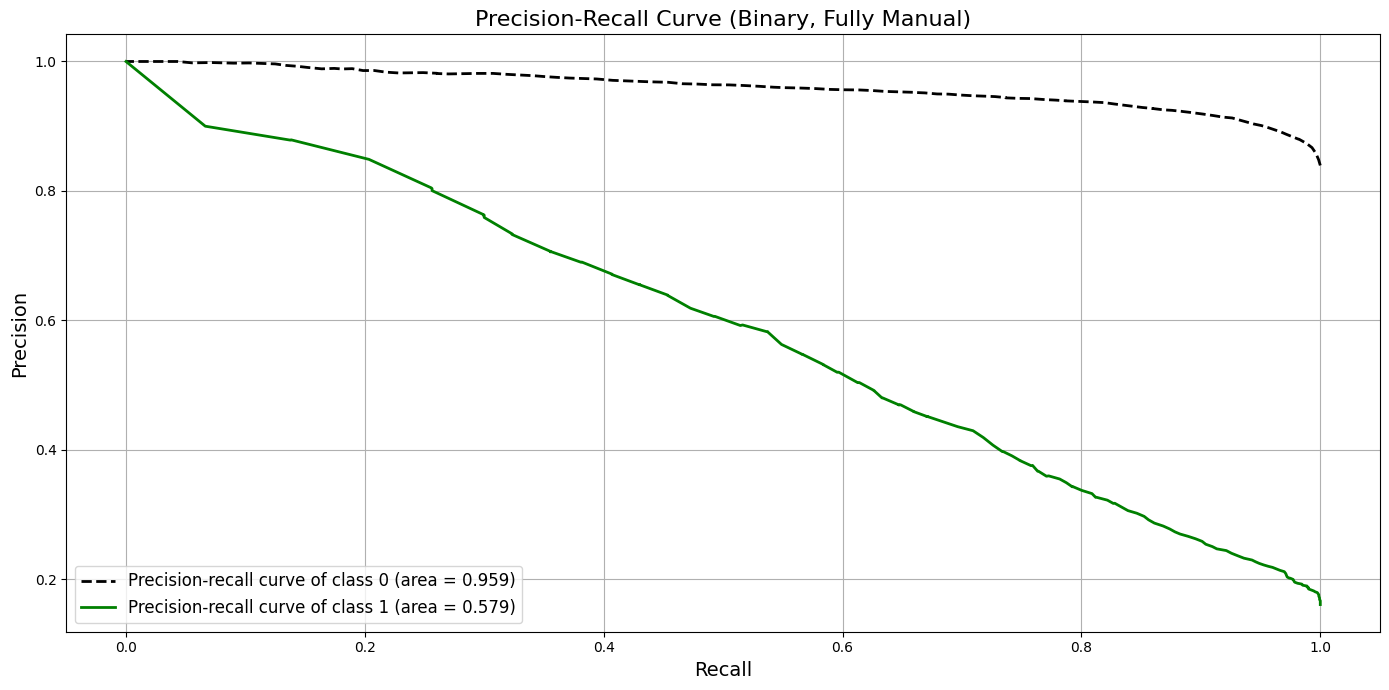

In [ ]:
y_true = original_df_with_pcs['Attrition_Flag']
y_proba = rf_pipe.predict_proba(original_df_with_pcs[X_features])

precision_1, recall_1, _ = precision_recall_curve(y_true, y_proba[:, 1])
ap_1 = average_precision_score(y_true, y_proba[:, 1])

precision_0, recall_0, _ = precision_recall_curve(1 - y_true, y_proba[:, 0])
ap_0 = average_precision_score(1 - y_true, y_proba[:, 0])

precision_micro, recall_micro, _ = precision_recall_curve(y_true.ravel(), y_proba[:, 1])
ap_micro = average_precision_score(y_true.ravel(), y_proba[:, 1])

plt.figure(figsize=(14, 7))

plt.plot(recall_0, precision_0, label=f"Precision-recall curve of class 0 (area = {ap_0:.3f})", color="black", linestyle='--', linewidth=2)

plt.plot(recall_1, precision_1, label=f"Precision-recall curve of class 1 (area = {ap_1:.3f})", color="green", linestyle='-', linewidth=2)

plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (Binary, Fully Manual)", fontsize=16)
plt.legend(loc="lower left", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()